## Récupération des données 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import gc
import warnings
import time
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
application_train = pd.read_csv('./files/application_train.csv')
application_test= pd.read_csv('./files/application_test.csv')
bureau = pd.read_csv('./files/bureau.csv')
bureau_balance = pd.read_csv('./files/bureau_balance.csv')
POS_CASH_balance = pd.read_csv('./files/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('./files/credit_card_balance.csv')
previous_application = pd.read_csv('./files/previous_application.csv')
installments_payments = pd.read_csv('./files/installments_payments.csv')

In [4]:
print('------------main------------')
print('application_train:', application_train.shape[0], "rows and", application_train.shape[1],'columns')
print('application_test:', application_test.shape[0], "rows and", application_test.shape[1],'columns')
print('      ')
print('------------others------------')
print('POS_CASH_balance:', POS_CASH_balance.shape[0], "rows and", POS_CASH_balance.shape[1],'columns')
print('bureau:', bureau.shape[0], "rows and", bureau.shape[1],'columns')
print('bureau_balance:', bureau_balance.shape[0], "rows and", bureau_balance.shape[1],'columns')
print('previous_application:', previous_application.shape[0], "rows and", previous_application.shape[1],'columns')
print('installments_payments:', installments_payments.shape[0], "rows and", installments_payments.shape[1],'columns')
print('credit_card_balance:', credit_card_balance.shape[0], "rows and", credit_card_balance.shape[1],'columns')

------------main------------
application_train: 307511 rows and 122 columns
application_test: 48744 rows and 121 columns
      
------------others------------
POS_CASH_balance: 10001358 rows and 8 columns
bureau: 1716428 rows and 17 columns
bureau_balance: 27299925 rows and 3 columns
previous_application: 1670214 rows and 37 columns
installments_payments: 13605401 rows and 8 columns
credit_card_balance: 3840312 rows and 23 columns


### 2. Check the data

#### 2.1 application train / test

In [5]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [3]:
def find_missing(data):
    # number of missing values
    count_missing = data.isnull().sum().values
    # total records
    total = data.shape[0]
    # percentage of missing
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)
find_missing(application_train).head(12)

,missing_count,missing_ratio
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.000039


### 2.2 POS_CASH_balance

In [9]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [10]:
POS_CASH_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [11]:
find_missing(POS_CASH_balance).head(12)

,missing_count,missing_ratio
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
CNT_INSTALMENT,26071,0.002607
CNT_INSTALMENT_FUTURE,26087,0.002608
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


### 2.3 bureau

In [12]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [13]:
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

In [14]:
find_missing(bureau).head(12)

,missing_count,missing_ratio
SK_ID_CURR,0,0.000000
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
DAYS_CREDIT_ENDDATE,105553,0.061496
DAYS_ENDDATE_FACT,633653,0.369170
AMT_CREDIT_MAX_OVERDUE,1124488,0.655133
CNT_CREDIT_PROLONG,0,0.000000


### 2.4 bureau_balance

In [15]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [16]:
bureau_balance.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [17]:
find_missing(bureau_balance).head(12)

,missing_count,missing_ratio
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


### 2.5 credit_card_balance

In [18]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [20]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [21]:
find_missing(credit_card_balance).head(12)

,missing_count,missing_ratio
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
AMT_BALANCE,0,0.000000
AMT_CREDIT_LIMIT_ACTUAL,0,0.000000
AMT_DRAWINGS_ATM_CURRENT,749816,0.195249
AMT_DRAWINGS_CURRENT,0,0.000000
AMT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
AMT_INST_MIN_REGULARITY,305236,0.079482


### 2.6 previous_application

In [22]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [25]:
find_missing(previous_application).head(12)

,missing_count,missing_ratio
SK_ID_PREV,0,0.000000e+00
SK_ID_CURR,0,0.000000e+00
NAME_CONTRACT_TYPE,0,0.000000e+00
AMT_ANNUITY,372235,2.228667e-01
AMT_APPLICATION,0,0.000000e+00
AMT_CREDIT,1,5.987257e-07
AMT_DOWN_PAYMENT,895844,5.363648e-01
AMT_GOODS_PRICE,385515,2.308177e-01
WEEKDAY_APPR_PROCESS_START,0,0.000000e+00
HOUR_APPR_PROCESS_START,0,0.000000e+00


### 2.7 Installments_payments

In [26]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [27]:
installments_payments.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [128]:
application_train['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [28]:
find_missing(installments_payments).head(12)

,missing_count,missing_ratio
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
DAYS_ENTRY_PAYMENT,2905,0.000214
AMT_INSTALMENT,0,0.000000
AMT_PAYMENT,2905,0.000214


## 3. Explore the data  

### 3.1 Categorical features

#### Label

In [4]:
application_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

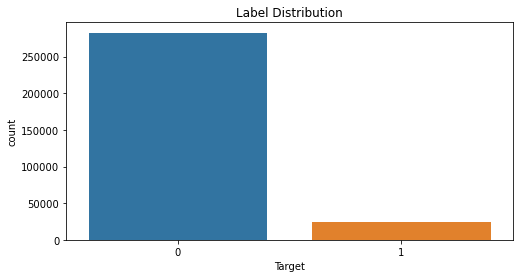

In [5]:
def plot_categorical(data, col, size=[8 ,4], xlabel_angle=0, title='', xtick=['Good', 'Default']):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts()
    plt.figure(figsize = size)
    sns.countplot(x = data[col], order= plotdata.index, data=data)
    ###plt.xticks(plotdata.index,xtick)
    plt.xlabel('Target')
    plt.title(title)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    plt.show()
plot_categorical(data=application_train, col='TARGET', size=[8 ,4], xlabel_angle=0, title='Label Distribution')

### Occupation Type

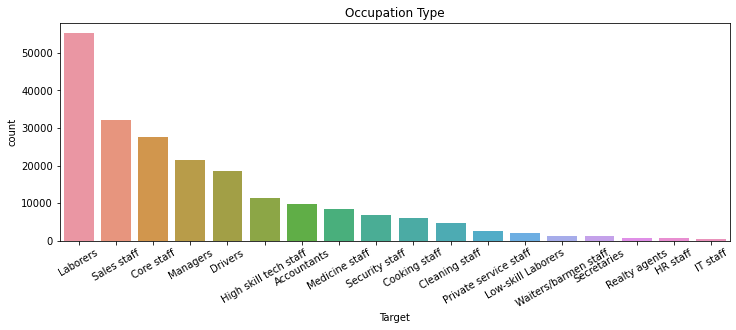

In [7]:
plot_categorical(data=application_train, col='OCCUPATION_TYPE', size=[12 ,4], xlabel_angle=30, title='Occupation Type')

#### Gender

### Income Type

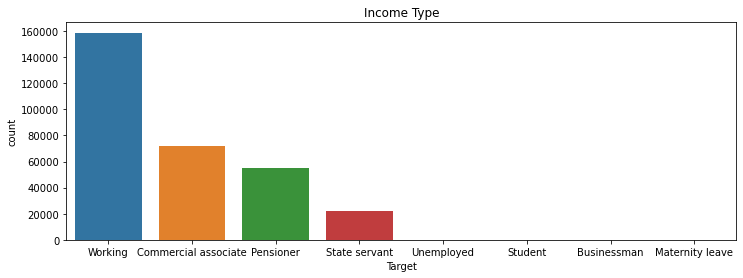

In [8]:
plot_categorical(data=application_train, col='NAME_INCOME_TYPE', size=[12 ,4], xlabel_angle=0, title='Income Type')

### Housse Type

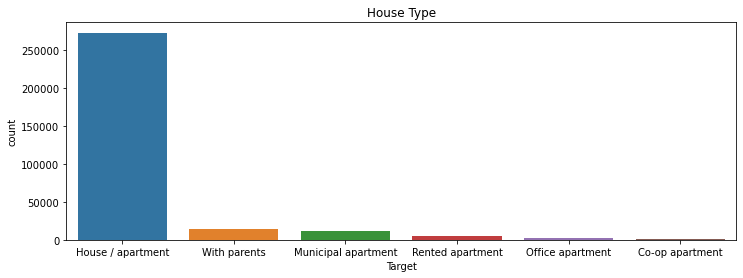

In [7]:
plot_categorical(data=application_train, col='NAME_HOUSING_TYPE', size=[12 ,4], xlabel_angle=0, title='House Type')

### 3.2 Numerical features

#### Credit Amount

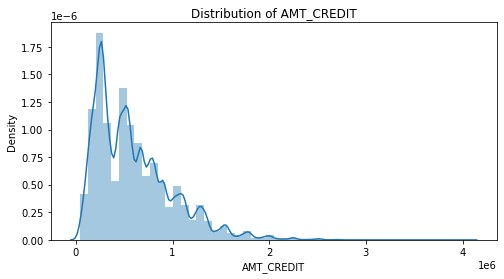

In [9]:
def plot_numerical(data, col, size=[8, 4], bins=50):
    '''use this for ploting the distribution of numercial features'''
    plt.figure(figsize=size)
    plt.title("Distribution of %s" % col)
    sns.distplot(data[col].dropna(), kde=True,bins=bins)
    plt.show()
plot_numerical(application_train, 'AMT_CREDIT')

#### Annuity amount

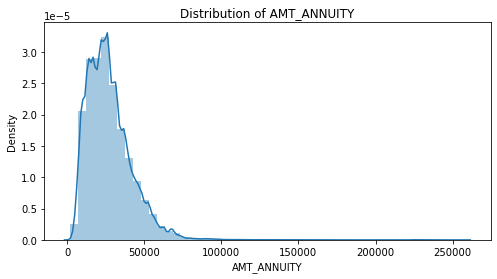

In [9]:
plot_numerical(application_train, 'AMT_ANNUITY')

### Days Employed

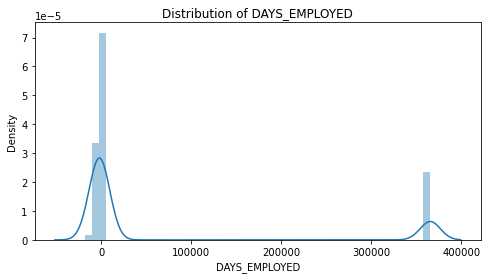

In [10]:
plot_numerical(application_train, 'DAYS_EMPLOYED')

### 3.3 Categorical features by label

#### Gender

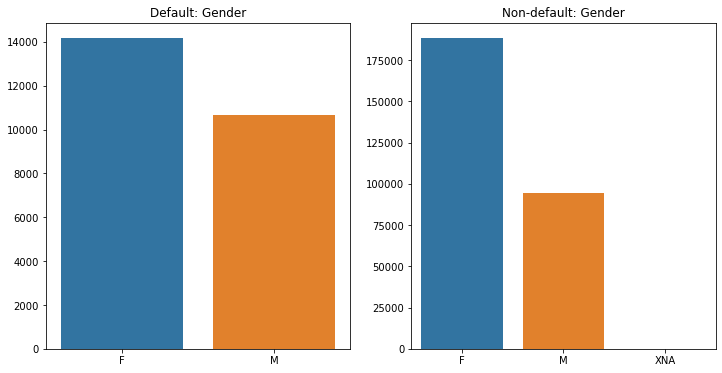

In [11]:
def plot_categorical_bylabel(data, col, size=[12 ,6], xlabel_angle=0, title=''):
    '''use it to compare the distribution between label 1 and label 0'''
    plt.figure(figsize = size)
    l1 = data.loc[data.TARGET==1, col].value_counts()
    l0 = data.loc[data.TARGET==0, col].value_counts()
    plt.subplot(1,2,1)
    sns.barplot(x = l1.index, y=l1.values)
    plt.title('Default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.subplot(1,2,2)
    sns.barplot(x = l0.index, y=l0.values)
    plt.title('Non-default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.show()
plot_categorical_bylabel(application_train, 'CODE_GENDER', title='Gender')

#### Education Type

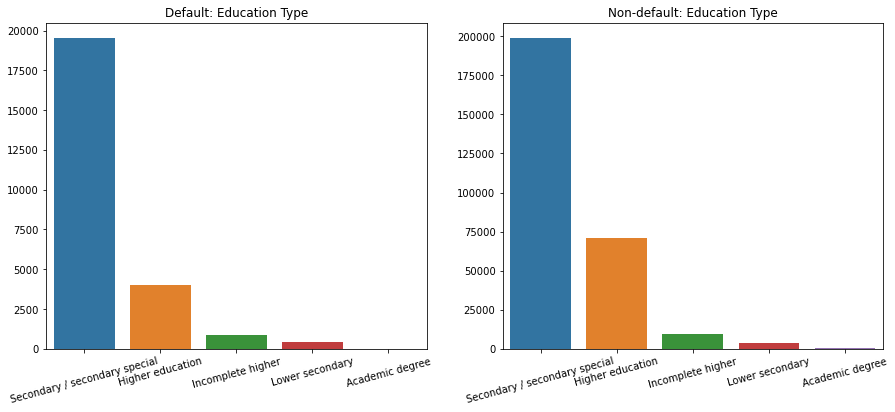

In [12]:
plot_categorical_bylabel(application_train, 'NAME_EDUCATION_TYPE', size=[15 ,6], xlabel_angle=15, title='Education Type')

### 3.4 Numerical features by label

#### EXT_SOURCE_1

The correlation between EXT_SOURCE_1 and the TARGET is -0.1553


<Figure size 864x432 with 0 Axes>

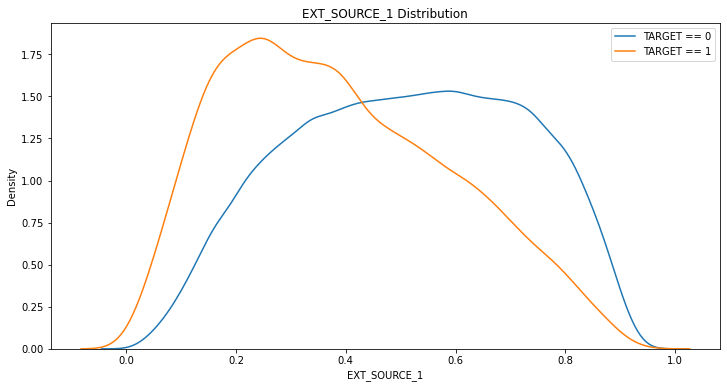

In [13]:
def plot_numerical_bylabel(data, col, size=[12, 6]):
    plt.figure(figsize=size)
    # Calculate the correlation coefficient between the new variable and the target
    corr = data['TARGET'].corr(data[col])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = data.loc[data['TARGET'] == 0, col].median()
    avg_not_repaid = data.loc[data['TARGET'] == 1, col].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(data.loc[data['TARGET'] == 0, col], label = 'TARGET == 0')
    sns.kdeplot(data.loc[data['TARGET'] == 1, col], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(col); plt.ylabel('Density'); plt.title('%s Distribution' % col)
    plt.legend();
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (col, corr))
    # Print out average values
plot_numerical_bylabel(application_train, 'EXT_SOURCE_1')

#### EXT_SOURCE_2 

The correlation between EXT_SOURCE_2 and the TARGET is -0.1605


<Figure size 864x432 with 0 Axes>

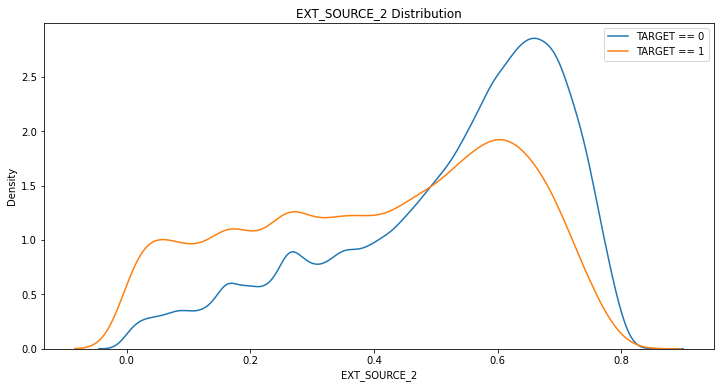

In [14]:
plot_numerical_bylabel(application_train, 'EXT_SOURCE_2')

#### EXT_SOURCE_3

The correlation between EXT_SOURCE_3 and the TARGET is -0.1789


<Figure size 864x432 with 0 Axes>

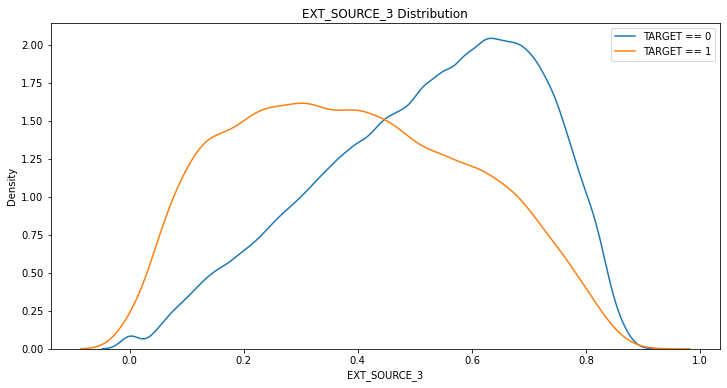

In [15]:
plot_numerical_bylabel(application_train, 'EXT_SOURCE_3')

### 3.5 Correlation Matrix

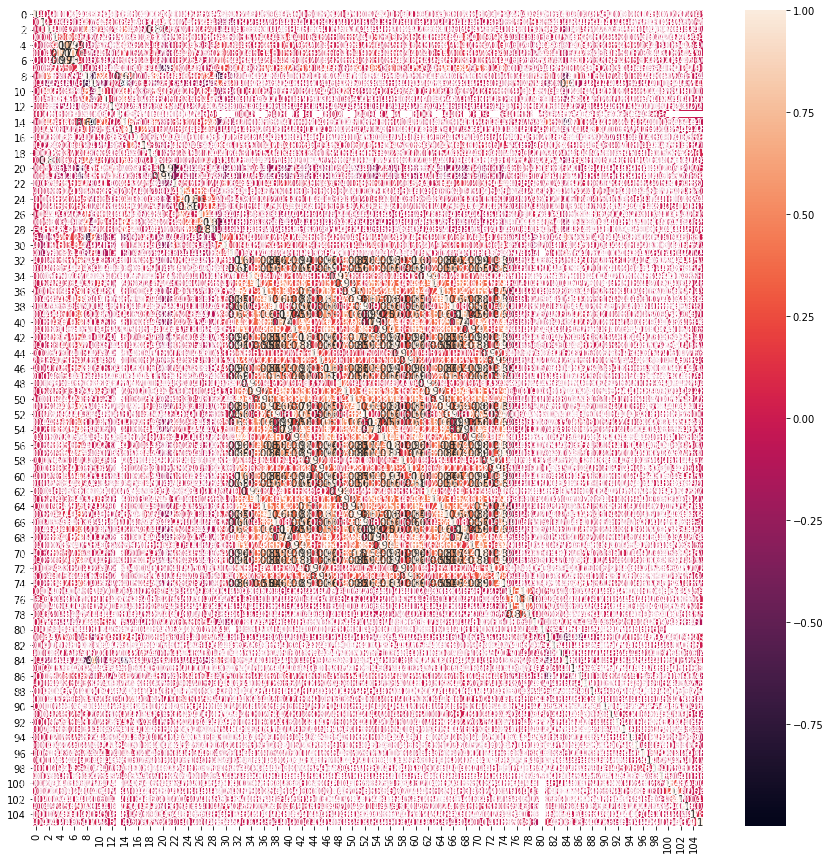

In [16]:
corr_mat = application_train.corr()
plt.figure(figsize=[15, 15])
sns.heatmap(corr_mat.values, annot=True)
plt.show()

### 4 A further exploration on application table

#### 4.1 Impute missing values

In [24]:
from sklearn.impute import SimpleImputer
from autoimpute.imputations import MiceImputer
application_train = pd.read_csv('./files/application_train.csv')

In [25]:
MICEImputer = MiceImputer()

#### split categorical, discrete and numerical features

In [26]:
def feature_type_split(data, special_list=[]):
    cat_list = []
    dis_num_list = []
    num_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            cat_list.append(i)
        elif data[i].nunique() < 25:
            dis_num_list.append(i)
        elif i in special_list:     # if you want to add some special cases
            dis_num_list.append(i)
        else:
            num_list.append(i)
    return cat_list, dis_num_list, num_list
cat_list, dis_num_list, num_list = feature_type_split(application_train, special_list=['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [19]:
print(str(len(cat_list)),'categorical features:', cat_list)
print('-----------------------------------------')
print(str(len(dis_num_list)),'discrete numerical features:',dis_num_list)
print('-----------------------------------------')
print(str(len(num_list)),'continuous numerical features:',num_list)

16 categorical features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
-----------------------------------------
46 discrete numerical features: ['TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', '

#### convert categorical using LabelEncoder

In [146]:
print(application_train.shape)

(307511, 122)


#### impute missing values

In [27]:
#discrete
start = time.time()
application_train[cat_list] = SimpleImputer(strategy='most_frequent').fit_transform(application_train[cat_list])
application_train[dis_num_list] = SimpleImputer(strategy='most_frequent').fit_transform(application_train[dis_num_list])
end = time.time()
print('discrete imputing time:', str(round((end - start)/60)), 'mins')
###continuous 
start = time.time()
application_train[num_list] = MICEImputer(initial_strategy='median', n_imputations=50, n_nearest_features=20, verbose=True).fit_transform(application_train[num_list])
end = time.time()
print('continuous imputing time:', str(round((end - start)/60)), 'mins')

discrete imputing time: 39 mins


TypeError: 'MiceImputer' object is not callable

### Create more features

### Term: total credit / annuity

In [28]:
# some new features
application_train['TERM'] = application_train.AMT_CREDIT / application_train.AMT_ANNUITY

### OVER_EXPECT_CREDIT: actual credit larger than goods price

In [29]:
application_train['OVER_EXPECT_CREDIT'] = (application_train.AMT_CREDIT > application_train.AMT_GOODS_PRICE).map({False:0, True:1})
#application_test['OVER_EXPECT_CREDIT'] = (application_test.AMT_CREDIT > application_test.AMT_GOODS_PRICE).map({False:0, True:1})

### MEAN_BUILDING_SCORE_TOTAL: the sum of all building AVG score 

In [30]:
application_train['MEAN_BUILDING_SCORE_AVG'] = application_train.iloc[:, 44:58].mean(skipna=True, axis=1)
application_train['TOTAL_BUILDING_SCORE_AVG'] = application_train.iloc[:, 44:58].sum(skipna=True, axis=1)
#application_test['MEAN_BUILDING_SCORE_AVG'] = application_test.iloc[:, 44:58].mean(skipna=True, axis=1)
#application_test['TOTAL_BUILDING_SCORE_AVG'] = application_test.iloc[:, 44:58].sum(skipna=True, axis=1)

### FLAG_DOCUMENT_TOTAL: the total number of provided document

In [31]:
application_train['FLAG_DOCUMENT_TOTAL'] = application_train.iloc[:, 96:116].sum(axis=1)
#application_test['FLAG_DOCUMENT_TOTAL'] = application_test.iloc[:, 96:116].sum(axis=1)

### AMT_REQ_CREDIT_BUREAU_TOTAL: the total number of enquiries

In [32]:
application_train['AMT_REQ_CREDIT_BUREAU_TOTAL'] = application_train.iloc[:, 116:122].sum(axis=1)
#application_test['AMT_REQ_CREDIT_BUREAU_TOTAL'] = application_test.iloc[:, 116:122].sum(axis=1)

### BIRTH_EMPLOTED_INTERVEL: the days between born and employed

In [33]:
application_train['BIRTH_EMPLOTED_INTERVEL'] = application_train.DAYS_EMPLOYED - application_train.DAYS_BIRTH
#application_test['BIRTH_EMPLOTED_INTERVEL'] = application_test.DAYS_EMPLOYED - application_test.DAYS_BIRTH

In [34]:
application_train['BIRTH_REGISTRATION_INTERVEL'] = application_train.DAYS_REGISTRATION - application_train.DAYS_BIRTH
application_test['BIRTH_REGISTRATION_INTERVEL'] = application_test.DAYS_REGISTRATION - application_test.DAYS_BIRTH

In [35]:
application_train['MEAN_BUILDING_SCORE_AVG'] = application_train.iloc[:, 44:58].mean(skipna=True, axis=1)
application_train['TOTAL_BUILDING_SCORE_AVG'] = application_train.iloc[:, 44:58].sum(skipna=True, axis=1)
application_train['INCOME_PER_FAMILY_MEMBER'] = application_train.AMT_INCOME_TOTAL / application_train.CNT_FAM_MEMBERS
application_train['SEASON_REMAINING'] = application_train.AMT_INCOME_TOTAL/4 -  application_train.AMT_ANNUITY
application_train['RATIO_INCOME_GOODS'] = application_train.AMT_INCOME_TOTAL -  application_train.AMT_GOODS_PRICE
application_train['CHILDREN_RATIO'] = application_train['CNT_CHILDREN'] / application_train['CNT_FAM_MEMBERS']
# convert categorical variables to numericals
from sklearn.preprocessing import LabelEncoder
def label_encoder(input_df, encoder_dict=None):
    """ Process a dataframe into a form useable by LightGBM """
    # Label encode categoricals
    categorical_feats = input_df.columns[input_df.dtypes == 'object']
    for feat in categorical_feats:
        encoder = LabelEncoder()
        input_df[feat] = encoder.fit_transform(input_df[feat].fillna('NULL'))
    return input_df, categorical_feats.tolist(), encoder_dict
application_train, categorical_feats, encoder_dict = label_encoder(application_train)


### 4.3 Train model

In [36]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [37]:
X = application_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = application_train.TARGET
X_pred = application_test.drop(['SK_ID_CURR'], axis=1)

In [38]:
np.where(np.isnan(X))

(array([     0,      1,      1, ..., 307510, 307510, 307510], dtype=int64),
 array([19, 19, 41, ..., 79, 80, 82], dtype=int64))

### Impute Missing values

In [39]:
X.fillna(X.mean(), inplace=True)

### Séparation des données en train et test 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [41]:
lgbm_classifier = lgb.LGBMClassifier(class_weight = 'balanced')

In [42]:
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced')

### 4.4 Feature Importance

In [ ]:
lgb.plot_importance(lgb_es_model,height=0.5, max_num_features=20, ignore_zero = False, figsize = (12,6), importance_type ='gain')

### 4.5 Prediction

In [ ]:
application_test= pd.read_csv('./files/application_test.csv')
output = pd.DataFrame({'SK_ID_CURR':application_test.SK_ID_CURR, 'TARGET': sub_preds})
output.to_csv('only_application_pred.csv', index=False)

In [46]:
application_pred = pd.read_csv('./only_application_pred.csv')

In [47]:
application_pred.head()

,SK_ID_CURR,TARGET
0,100001,0.034143
1,100005,0.107658
2,100013,0.016952
3,100028,0.040978
4,100038,0.146348


In [48]:
X = application_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = application_train.loc[:, application_train.columns =='TARGET']
X_pred = application_test.drop(['SK_ID_CURR'], axis=1)

In [49]:
X.fillna(X.mean(), inplace=True)
y.fillna(X.mean(), inplace=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

## Gestion des données déséquilibrées par "Class Weights"

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [52]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = ", accuracy_score(y_actual, y_predicted))
    print("Precision = ", precision_score(y_actual, y_predicted))
    print("Recall = ", recall_score(y_actual, y_predicted))
    print("F1 Score = ", f1_score(y_actual, y_predicted))
    pass

In [53]:
def generate_auc_roc_cuerve(clf, X_test):
    y_preda_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_preda_proba)
    auc = roc_auc_score(y_test, y_preda_proba)
    plt.plot(fpr, tpr, label = "AUC ROC Curve with Area Under the curve = "+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass
    

In [54]:
clf = LogisticRegression().fit(X_train, y_train)

In [55]:
Y_Test_Pred = clf.predict(X_test)

In [56]:
target = application_train.TARGET

In [57]:
generate_model_report(y_test, Y_Test_Pred)

Accuracy =  0.9196457606174258
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


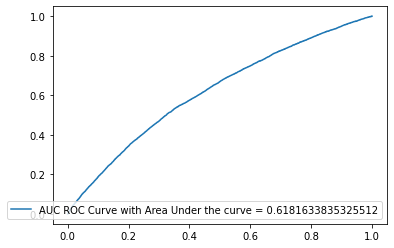

In [58]:
generate_auc_roc_cuerve(clf, X_test)

In [59]:
y_train

,TARGET
127044,0.0
281143,1.0
199799,0.0
306749,0.0
301347,0.0
...,...
119879,0.0
259178,0.0
131932,0.0
146867,0.0


In [60]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(y_test['TARGET'], name = 'Actual'))

Actual,0.0,1.0
Predicted,,
0.0,25371,2194


In [61]:
print(X_train.shape, y_train.shape)

(215257, 132) (215257, 1)


In [62]:
clf_weight = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

In [63]:
from sklearn.utils import class_weight

In [64]:
class_weight.compute_class_weight('balanced', np.unique(y_train), y_train['TARGET'])

array([0.54400414, 6.18128302])

In [65]:
Y_Test_Pred = clf_weight.predict(X_test)

In [66]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(y_test['TARGET'], name = 'Actual'))

Actual,0.0,1.0
Predicted,,
0.0,15361,1294
1.0,10010,900


In [67]:
generate_model_report(y_test, Y_Test_Pred)

Accuracy =  0.6086782144947644
Precision =  0.10823728628393511
Recall =  0.5346013759611493
F1 Score =  0.18002589320189885


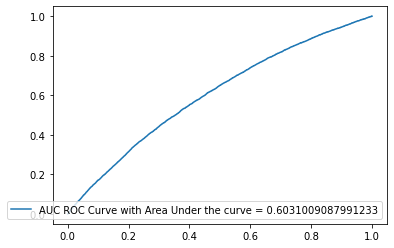

In [68]:
generate_auc_roc_cuerve(clf_weight, X_test)

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight' : [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)
grid_result = gsc.fit(X_train, y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.09736842105263158, 1: 0.9026315789473685}}


<AxesSubplot:xlabel='weight'>

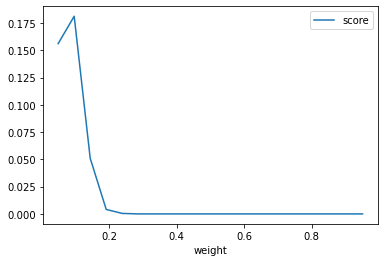

In [71]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                        'weight' : weights })
data_out.plot(x='weight')

In [72]:
data_out

,score,weight
0,0.156056,0.050000
1,0.181155,0.097368
2,0.050952,0.144737
3,0.004087,0.192105
4,0.000459,0.239474
5,0.000000,0.286842
6,0.000000,0.334211
7,0.000000,0.381579
8,0.000000,0.428947
9,0.000000,0.476316


In [73]:
clf_best_params = LogisticRegression(**grid_result.best_params_).fit(X_train, y_train)

In [74]:
Y_Test_Pred = clf_best_params.predict(X_test)

In [75]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(y_test['TARGET'], name = 'Actual'))

Actual,0.0,1.0
Predicted,,
0.0,20563,1743
1.0,4808,451


In [76]:
generate_model_report(y_test, Y_Test_Pred)

Accuracy =  0.7737008693389988
Precision =  0.12327923894795748
Recall =  0.29718062862538785
F1 Score =  0.17426729422932408


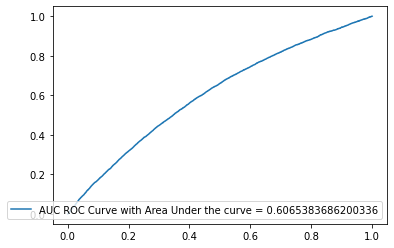

In [77]:
generate_auc_roc_cuerve(clf_best_params, X_test)

### Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline
from sklearn.experimental import enable_hist_gradient_boosting

In [79]:
sp_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train['TARGET'])
sp_weight

array([0.54400414, 6.18128302])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [81]:
X_train.shape, X_test.shape

((246008, 132), (61503, 132))

### Prétraitement données

In [82]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### recherche des hyperparamètres

In [84]:
rf_classifier = RandomForestClassifier(class_weight = "balanced")
params = {
          'max_depth': [2, 4, 5],
          'min_samples_leaf': [30, 31, 32],
          'min_samples_split': [30, 31, 32],
          }
gsv = model_selection.GridSearchCV(rf_classifier, params, cv=5 )
gsv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [2, 4, 5],
                         'min_samples_leaf': [30, 31, 32],
                         'min_samples_split': [30, 31, 32]})

In [85]:
gsv.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=32, min_samples_split=32)

### hyperparametres avec Extra Trees

In [86]:
ext_classifier = ExtraTreesClassifier(class_weight = "balanced")
params = {
          'max_depth': [2, 4, 5],
          'min_samples_leaf': [30, 31, 32],
          'min_samples_split': [30, 31, 32],
          }
gsv_ext = model_selection.GridSearchCV(ext_classifier, params, cv=5 )
gsv_ext.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(class_weight='balanced'),
             param_grid={'max_depth': [2, 4, 5],
                         'min_samples_leaf': [30, 31, 32],
                         'min_samples_split': [30, 31, 32]})

In [143]:
gsv_ext.best_estimator_

ExtraTreesClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=32,
                     min_samples_split=30)

### Applying the models on the data after imputation

## Fonction Cout  Orienté Métier

In [92]:
def fonctionCout(y_test, y_pre):  
    cnf_matrix = confusion_matrix(y_test, y_pre)
    
    vp, fp, fn, vn = cnf_matrix.ravel()
    cout = vp + vn +(2*fp) + (15*fn)
    return cout
    

### Logistic Regression

In [93]:
# Spliting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.33,random_state=1)

logreg_basic = LogisticRegression()
# Training the basic logistic regression model with training set 
logreg_basic.fit(X_train,y_train)

# Printing the coefficients
# print("intercept ")
#print(logreg_basic.intercept_)
#print("")
#print("coefficients ")
#print(logreg_basic.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre = logreg_basic.predict(X_test)

# Validating the algorithm using various Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a0 = accuracy_score(y_test,y_pre)
f0 = f1_score(y_test, y_pre, average="macro")
p0 = precision_score(y_test, y_pre, average="macro")
r0 = recall_score(y_test, y_pre, average="macro")
cout0 = fonctionCout(y_test, y_pre)

print("accuracy score : ",a0)
print("f1 score : ",f0)
print("precision score : ",p0)
print("recall score : ",r0)
print("cout bancaire: ",cout0)


accuracy score :  0.9192246671725185
f1 score :  0.4789562592100062
precision score :  0.45961233358625925
recall score :  0.5
cout bancaire:  216237


In [95]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[58109 35173]
 [ 2520  5677]]


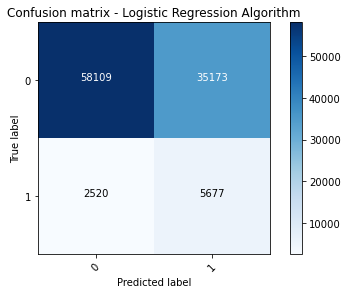

In [98]:
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
                      title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

### Decision Tree Classifier

accuracy score :  0.6456114072862366
f1 score :  0.503612892058583
precision score :  0.551415288982649
recall score :  0.6638563494904508
cout bancaire :  170943
Confusion matrix, without normalization
[[59896 33386]
 [ 2577  5620]]


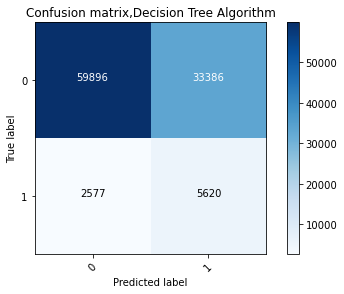

In [99]:
# importing the required modules
from sklearn.tree import DecisionTreeClassifier

extra_tree = ExtraTreesClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=32, min_samples_split=30)

# Training the basic Decision Tree model with training set 
extra_tree.fit(X_train,y_train)

# Predicting the output of the test cases using the algorithm created above
y_pre = extra_tree.predict(X_test)

# Validating the algorithm using various Performance metrics

a1 = accuracy_score(y_test,y_pre)
f1 = f1_score(y_test, y_pre, average="macro")
p1 = precision_score(y_test, y_pre, average="macro")
r1 = recall_score(y_test, y_pre, average="macro")
cout1 = fonctionCout(y_test,y_pre)
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
print("cout bancaire : ",cout1)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0","1"],
                      title='Confusion matrix,Decision Tree Algorithm')

plt.show()

## RandomForest with Best Estimator 

accuracy score :  0.6690251184974231
f1 score :  0.5178898601141766
precision score :  0.5554673815527162
recall score :  0.6719739851672598
cout bancaire :  169646
Confusion matrix, without normalization
[[62355 30927]
 [ 2660  5537]]


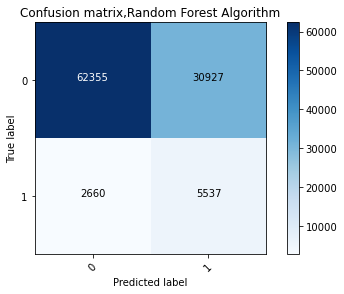

In [104]:
# importing the required modules
from sklearn.model_selection import train_test_split

random_best = RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=32)
# Training the basic Decision Tree model with training set 
random_best.fit(X_train,y_train)

# Predicting the output of the test cases using the algorithm created above
y_pre = random_best.predict(X_test)

# Validating the algorithm using various Performance metrics

a2= accuracy_score(y_test,y_pre)
f2 = f1_score(y_test, y_pre, average="macro")
p2 = precision_score(y_test, y_pre, average="macro")
r2 = recall_score(y_test, y_pre, average="macro")
cout2 = fonctionCout(y_test,y_pre)
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)
print("cout bancaire : ", cout2)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
                      title='Confusion matrix,Random Forest Algorithm')

plt.show()

In [105]:
# create dataframe sample_data
sample_data = X_test.reset_index()

In [106]:
#
sample_data.drop(columns = ["index"], inplace=True)

In [107]:
#
random_best.predict_proba(sample_data.loc[[0]])

array([[0.63, 0.37]])

In [108]:
sample_data

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TERM,OVER_EXPECT_CREDIT,MEAN_BUILDING_SCORE_AVG,TOTAL_BUILDING_SCORE_AVG,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOTED_INTERVEL,BIRTH_REGISTRATION_INTERVEL,INCOME_PER_FAMILY_MEMBER,SEASON_REMAINING,RATIO_INCOME_GOODS,CHILDREN_RATIO
0,0,0,0,1,0.0,135000.0,654498.0,31617.0,585000.0,6,3,4,1,1,0.005313,-20614,365243,-8985.0,-3098,12.061091,1.0,0.0,0.0,1.0,0.0,0.0,8,2.0,2.0,2.0,5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,57,0.502130,0.622652,0.602386,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.07449,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.11785,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,2,0,0.102547,4,0,0.0,0.0,0.0,0.0,-1237.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,20.700826,1,0.229796,0.0000,1.0,3.0,385857,11629.0,67500.0,2133.0,-450000.0,0.000000
1,0,1,1,1,0.0,135000.0,234576.0,25393.5,202500.0,6,7,4,3,5,0.010643,-9080,-1080,-1909.0,-1743,13.000000,1.0,1.0,0.0,1.0,0.0,0.0,4,1.0,2.0,2.0,5,17.0,0.0,0.0,0.0,0.0,0.0,0.0,11,0.502130,0.655960,0.492060,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.07449,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.11785,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,2,0,0.102547,4,0,1.0,0.0,1.0,0.0,-379.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.237640,1,0.229796,0.0000,1.0,1.0,8

### Confusion matrix with Decision Tree 

accuracy score :  0.8494269750391706
f1 score :  0.5344823186461151
precision score :  0.5322848705790537
recall score :  0.5379801211027173
cout bancaire :  205575
Confusion matrix, without normalization
[[84834  8448]
 [ 6832  1365]]


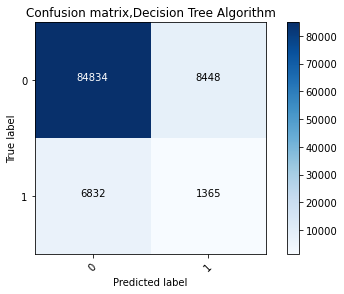

In [109]:
# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
# Training the basic Decision Tree model with training set 
dectree_basic.fit(X_train,y_train)

# Predicting the output of the test cases using the algorithm created above
y_pre = dectree_basic.predict(X_test)

# Validating the algorithm using various Performance metrics

a3 = accuracy_score(y_test,y_pre)
f3 = f1_score(y_test, y_pre, average="macro")
p3 = precision_score(y_test, y_pre, average="macro")
r3 = recall_score(y_test, y_pre, average="macro")
cout3 = fonctionCout(y_test, y_pre)
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)
print("cout bancaire : ",cout3)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
                      title='Confusion matrix,Decision Tree Algorithm')

plt.show()

### Using Pearson Correlation factor for feature selection

accuracy score :  0.9192246671725185
f1 score :  0.4789562592100062
precision score :  0.45961233358625925
recall score :  0.5
cout bancaire :  216237
Confusion matrix, without normalization
[[93282     0]
 [ 8197     0]]


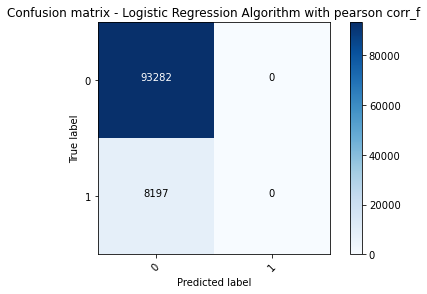

In [111]:
# Logistic Regression using above feature set 1
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pre = logreg.predict(X_test)
a4= accuracy_score(y_test,y_pre)
f4 = f1_score(y_test, y_pre, average="macro")
p4 = precision_score(y_test, y_pre, average="macro")
r4 = recall_score(y_test, y_pre, average="macro")
cout4  = fonctionCout(y_test, y_pre)
print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)
print("cout bancaire : ", cout4)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
title='Confusion matrix - Logistic Regression Algorithm with pearson corr_f')

plt.show()

accuracy score :  0.850974093162132
f1 score :  0.5356549512898972
precision score :  0.5335212021244509
recall score :  0.5388772932103019
cout bancaire :  205405
Confusion matrix, without normalization
[[84990  8292]
 [ 6831  1366]]


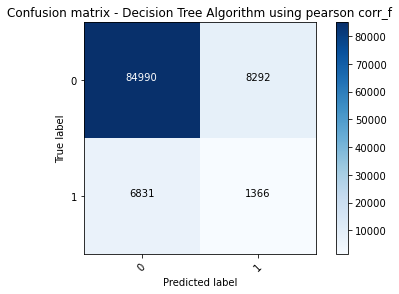

In [112]:
# Decision Tree classifier using feat1

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a5 = accuracy_score(y_test,y_pre)
f5 = f1_score(y_test, y_pre, average="macro")
p5 = precision_score(y_test, y_pre, average="macro")
r5 = recall_score(y_test, y_pre, average="macro")
cout5 = fonctionCout(y_test, y_pre)

print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)
print("cout bancaire : ", cout5)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", '1'],
title='Confusion matrix - Decision Tree Algorithm using pearson corr_f')

plt.show()

### Using chi2 test for feature selection

In [113]:
# Finding the best 10 features using chi2 test

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

accuracy score :  0.9192246671725185
f1 score :  0.4789562592100062
precision score :  0.45961233358625925
recall score :  0.5
cout bancaire :  216237
Confusion matrix, without normalization
[[93282     0]
 [ 8197     0]]


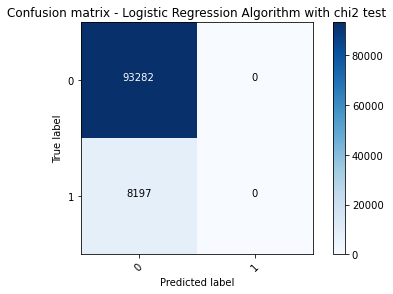

In [114]:
# Running the logistic regression algorithm using the features selected from chi2 test
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pre = logreg.predict(X_test)
y_pre = logreg.predict(X_test)
a6 = accuracy_score(y_test,y_pre)
f6 = f1_score(y_test, y_pre, average="macro")
p6 = precision_score(y_test, y_pre, average="macro")
r6 = recall_score(y_test, y_pre, average="macro")
cout6 = fonctionCout(y_test, y_pre)

print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)
print("cout bancaire : ",cout6)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
 title='Confusion matrix - Logistic Regression Algorithm with chi2 test')

plt.show()

###  Decision Tree classifier using features from chi2 test

accuracy score :  0.8500477931394673
f1 score :  0.5356335036469742
precision score :  0.5333816219336444
recall score :  0.5391523743573178
cout bancaire:  205317
Confusion matrix, without normalization
[[84882  8400]
 [ 6817  1380]]


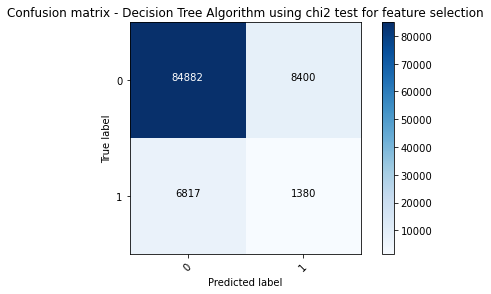

In [116]:
# Decision Tree classifier using features from chi2 test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a7 = accuracy_score(y_test,y_pre)
f7 = f1_score(y_test, y_pre, average="macro")
p7 = precision_score(y_test, y_pre, average="macro")
r7 = recall_score(y_test, y_pre, average="macro")
cout7 = fonctionCout(y_test, y_pre)

print("accuracy score : ",a7)
print("f1 score : ",f7)
print("precision score : ",p7)
print("recall score : ",r7)
print("cout bancaire: ",cout7)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
title='Confusion matrix - Decision Tree Algorithm using chi2 test for feature selection')

plt.show()

### Using f_classif for feature selection

In [90]:
from sklearn.feature_selection import f_classif

accuracy score :  0.9192246671725185
f1 score :  0.4789562592100062
precision score :  0.45961233358625925
recall score :  0.5
cout bancaire :  216237
Confusion matrix, without normalization
[[93282     0]
 [ 8197     0]]


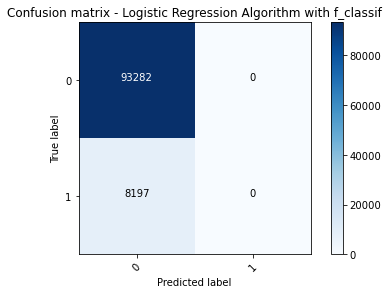

In [117]:
# Running the logistic regression algorithm using the features selected from f_classif test

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pre = logreg.predict(X_test)
a8 = accuracy_score(y_test,y_pre)
f8 = f1_score(y_test, y_pre, average="macro")
p8 = precision_score(y_test, y_pre, average="macro")
r8 = recall_score(y_test, y_pre, average="macro")
cout8 = fonctionCout(y_test, y_pre)

print("accuracy score : ",a8)
print("f1 score : ",f8)
print("precision score : ",p8)
print("recall score : ",r8)
print("cout bancaire : ",cout8)


# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
title='Confusion matrix - Logistic Regression Algorithm with f_classif')

plt.show()

### Decision Tree classifier using features from f_classif test

accuracy score :  0.8508262793287281
f1 score :  0.5352649344468419
precision score :  0.5331548265525634
recall score :  0.5384630648357146
cout bancaire :  205498
Confusion matrix, without normalization
[[84981  8301]
 [ 6837  1360]]


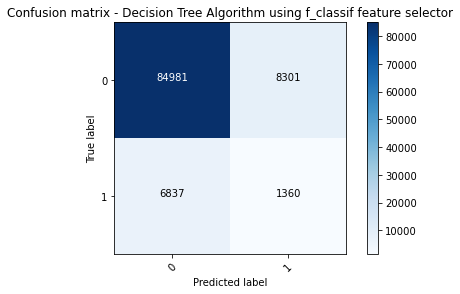

In [118]:
# Decision Tree classifier using features from f_classif test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a9 = accuracy_score(y_test,y_pre)
f9 = f1_score(y_test, y_pre, average="macro")
p9 = precision_score(y_test, y_pre, average="macro")
r9 = recall_score(y_test, y_pre, average="macro")
cout9 = fonctionCout(y_test, y_pre)

print("accuracy score : ",a9)
print("f1 score : ",f9)
print("precision score : ",p9)
print("recall score : ",r9)
print("cout bancaire : ",cout9)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
                      title='Confusion matrix - Decision Tree Algorithm using f_classif feature selector')

plt.show()

### Using f_regression for feature selection

In [94]:
from sklearn.feature_selection import f_regression

accuracy score :  0.9192246671725185
f1 score :  0.4789562592100062
precision score :  0.45961233358625925
recall score :  0.5
cout bancaire :  216237
Confusion matrix, without normalization
[[84981  8301]
 [ 6837  1360]]


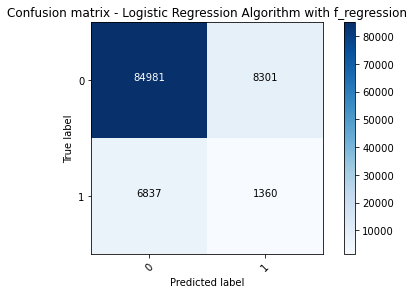

In [119]:
# Running the logistic regression algorithm using the features selected from f_regression test
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pre2 = logreg.predict(X_test)
a10 = accuracy_score(y_test,y_pre2)
f10 = f1_score(y_test, y_pre2, average="macro")
p10 = precision_score(y_test, y_pre2, average="macro")
r10 = recall_score(y_test, y_pre2, average="macro")
cout10 = fonctionCout(y_test, y_pre2)

print("accuracy score : ",a10)
print("f1 score : ",f10)
print("precision score : ",p10)
print("recall score : ",r10)
print("cout bancaire : ",cout10)


# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0","1"],
                      title='Confusion matrix - Logistic Regression Algorithm with f_regression')

plt.show()

accuracy score :  0.8500182303727865
f1 score :  0.5350515425782552
precision score :  0.5328617171656369
cout bancaire :  216237
Confusion matrix, without normalization
[[84891  8391]
 [ 6829  1368]]


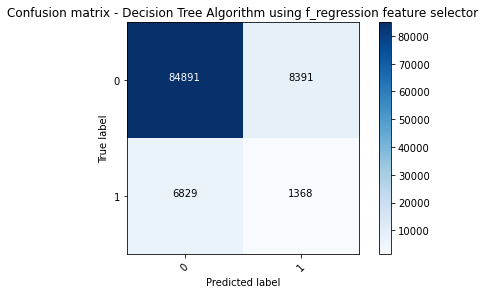

In [120]:
# Decision Tree classifier using features from f_regression test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(X_train,y_train)
y_pre = clf_tree.predict(X_test)
a11 = accuracy_score(y_test,y_pre)
f11 = f1_score(y_test, y_pre, average="macro")
p11= precision_score(y_test, y_pre, average="macro")
r11 = recall_score(y_test, y_pre, average="macro")
cout11 = fonctionCout(y_test, y_pre2)

print("accuracy score : ",a11)
print("f1 score : ",f11)
print("precision score : ",p11)
print("cout bancaire : ",cout11)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"], 
                      title='Confusion matrix - Decision Tree Algorithm using f_regression feature selector')

plt.show()

## Comparing all the models

In [121]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Random Forest', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree', 'Logistic Regression', 'Decision Tree'],
    'Feature Selection Method' : ['None','None','None', 'Confusion Matrix','Pearson corr_fact','Pearson corr_fact','chi2 test','chi2 test','f_classif','f_classif','f_regression','f_regression'],
    'Accuracy Score': [a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11],
    'Recall Score' : [r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11],
    'F1 Score' : [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10, f11],
    'Precision Score' : [p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10, p11],
    'Cout Bancaire ' : [cout0,cout1,cout2,cout3,cout4,cout5,cout6,cout7,cout8,cout9,cout10, cout11]
    
})

In [184]:
models

,Model,Feature Selection Method,Accuracy Score,Recall Score,F1 Score,Precision Score,Cout Bancaire
0,Logistic Regression,None,0.626997,0.658460,0.492670,0.548839,171727
1,Decision Tree,None,0.670346,0.672303,0.518667,0.555673,169603
2,Random Forest,None,0.850925,0.537905,0.534819,0.532771,205631
3,Logistic Regression,Pearson corr_fact,0.919225,0.500000,0.478956,0.459612,216237
4,Decision Tree,Pearson corr_fact,0.850511,0.538904,0.535551,0.533368,205387
5,Logistic Regression,chi2 test,0.919225,0.500000,0.478956,0.459612,216237
6,Decision Tree,chi2 test,0.850580,0.539219,0.535836,0.533629,205315
7,Logistic Regression,f_classif,0.919225,0.500000,0.478956,0.459612,216237
8,Decision Tree,f_classif,0.849713,0.538525,0.535016,0.532793,205455
9,Logistic Regression,f_regression,0.919225,0.500000,0.478956,0.459612,216237


In [122]:
pd.pivot_table(models,index = ["Feature Selection Method","Model"])

Accuracy Score  Cout Bancaire   \
Feature Selection Method Model                                                 
Confusion Matrix         Decision Tree              0.849427          205575   
None                     Decision Tree              0.645611          170943   
                         Logistic Regression        0.919225          216237   
                         Random Forest              0.669025          169646   
Pearson corr_fact        Decision Tree              0.850974          205405   
                         Logistic Regression        0.919225          216237   
chi2 test                Decision Tree              0.850048          205317   
                         Logistic Regression        0.919225          205333   
f_classif                Decision Tree              0.850826          205498   
                         Logistic Regression        0.919225          216237   
f_regression             Decision Tree              0.850018          216237   
                         Logistic Regression        0.919225          216237   

                                              F1 Score  Precision Score  \
Feature Selection Method Model                                            
Confusion Matrix         Decision Tree        0.534482         0.532285   
None                     Decision Tree        0.503613         0.551415   
                         Logistic Regression  0.478956         0.459612   
                         Random Forest        0.517890         0.555467   
Pearson corr_fact        Decision Tree        0.535655         0.533521   
                         Logistic Regression  0.478956         0.459612   
chi2 test                Decision Tree        0.535634         0.533382   
                         Logistic Regression  0.478956         0.459612   
f_classif                Decision Tree        0.535265         0.533155   
                         Logistic Regression  0.478956         0.459612   
f_regression             Decision Tree        0.535052         0.532862   
                         Logistic Regression  0.478956         0.459612   

                                              Recall Score  
Feature Selection Method Model                              
Confusion Matrix         Decision Tree            0.537980  
None                     Decision Tree            0.663856  
                         Logistic Regression      0.500000  
                         Random Forest            0.671974  
Pearson corr_fact        Decision Tree            0.538877  
                         Logistic Regression      0.500000  
chi2 test                Decision Tree            0.539152  
                         Logistic Regression      0.500000  
f_classif                Decision Tree            0.538463  
                         Logistic Regression      0.500000  
f_regression             Decision Tree            0.538469  
                         Logistic Regression      0.500000

## Discussion and Insights :

La régression logistique a produit des résultats avec une bonne précision, mais les performances globales ne sont pas si bonnes.
L'arbre de décision a dominé la régression logistique dans tous les cas.
Comme mentionné précédemment, les performances de l'arbre de décision sont restées presque les mêmes depuis le début, car la sélection des fonctionnalités est héritée. Les performances de la régression logistique se sont également améliorées après le processus de sélection des fonctionnalités.
Enfin, le modèle d'arbre de décision avec le sélecteur de fonctionnalités f_classf serait la meilleure méthode à utiliser car il a la valeur de RAPPEL la plus élevée
La profondeur maximale de l'arbre de décision est définie sur 100 dans tous les cas, le nombre de niveaux est donc de 101 dans tous les cas. Et puisque nous n'avons pas défini le nombre minimum d'observations dans la feuille, il sera de 1 car il s'agit d'un problème de classification.
Le seuil est défini par défaut sur 0,5 dans Régression logistique !
Évidemment, la modification du seuil affecte les performances du modèle et cela peut être observé dans la section suivante.
Cela peut être encore étendu en ré-échantillonnant les données pour augmenter le score de RAPPEL

#### L'utilisation de l'arbre de décision avec le sélecteur de fonction f_regression donnerait les meilleurs résultats !!

## Changing the threshold and observing the performance :

Recall metric in the testing dataset:  0.43894107600341586
Accuracy score for the testing dataset:  0.7012386799239252
Confusion matrix, without normalization
[[67563 25719]
 [ 4599  3598]]

Recall metric in the testing dataset:  0.06246187629620593
Accuracy score for the testing dataset:  0.8999497432966427
Confusion matrix, without normalization
[[90814  2468]
 [ 7685   512]]

Recall metric in the testing dataset:  0.001097962669269245
Accuracy score for the testing dataset:  0.9191359788724761
Confusion matrix, without normalization
[[93264    18]
 [ 8188     9]]

Recall metric in the testing dataset:  0.0
Accuracy score for the testing dataset:  0.9192246671725185
Confusion matrix, without normalization
[[93282     0]
 [ 8197     0]]

Recall metric in the testing dataset:  0.0
Accuracy score for the testing dataset:  0.9192246671725185
Confusion matrix, without normalization
[[93282     0]
 [ 8197     0]]

Recall metric in the testing dataset:  0.0
Accuracy score for the testing da

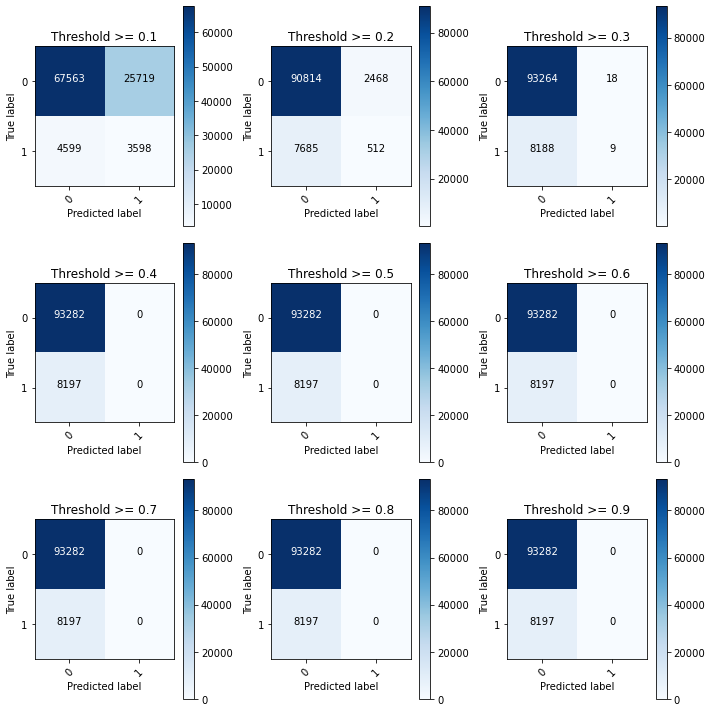

In [123]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] >= i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    rec1 = recall_score(y_test, y_test_predictions_high_recall)
    acc= 1.0*(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,1])
    print("Recall metric in the testing dataset: ",rec1)
    print("Accuracy score for the testing dataset: ",acc)
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
    print("")